# Co-occurrence matrix and network
## Intro
This is a notebook exploring the preparation of network analysis data from a sampling of Futurama code.
As of this morning (Thursday 3/28): it's not quite ready for "prime time" as an explanatory notebook ready for students to adapt. To do:
### Work on the data import
* Work on alternative/better ways to pull data into a nice TSV or JSON input (use saxonche). (Etree is also good (keep it for "flat" data)
* Work on explaining and identifying the data we're pulling:
    * related nodes: What do you want to network?
    * edges: Your concept of how and why they connect: (For example, do they share the same context--a co-occurence network? Are they adjacent to each other?)
 
### Work on the mapping of different measures of centrality
* Degree centrality and edge-betweenness data seem to be natively available in NetworkX networks
* Eigenvector (neighborhood) and closeness centrality (and others) are easily calculated, but this notebook needs to demonstrate how to properly map those to the network graph that networkx and pyvis plot

### Demonstrate file inputs and outputs

The notebook needs to read in source files, and export HTML or SVG.

For details, let's consult the Networkx tutorial at: <https://networkx.org/documentation/stable/tutorial.html> 

current scene: {'LEELA'}
scenes at this point? []
current scene: {'LEELA', 'FRY'}
scenes at this point? []
current scene: {'LEELA', 'FRY'}
scenes at this point? []
current scene: {'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: {'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: {'BENDER', 'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: {'BENDER', 'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: {'BENDER', 'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: {'BENDER', 'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: {'BENDER', 'PIRATE', 'LEELA', 'FRY'}
scenes at this point? []
current scene: set()
scenes at this point? [set()]
current scene: {'SOMEONE'}
scenes at this point? [{'SOMEONE'}]
current scene: {'SOMEONE', 'SOMEONE_ELSE'}
scenes at this point? [{'SOMEONE', 'SOMEONE_ELSE'}]
current scene: {'SOMEONE', 'FRY', 'SOMEONE_ELSE'}
scenes at this point? [{'SOMEONE', 'FRY', 'SOMEONE_ELSE'}]

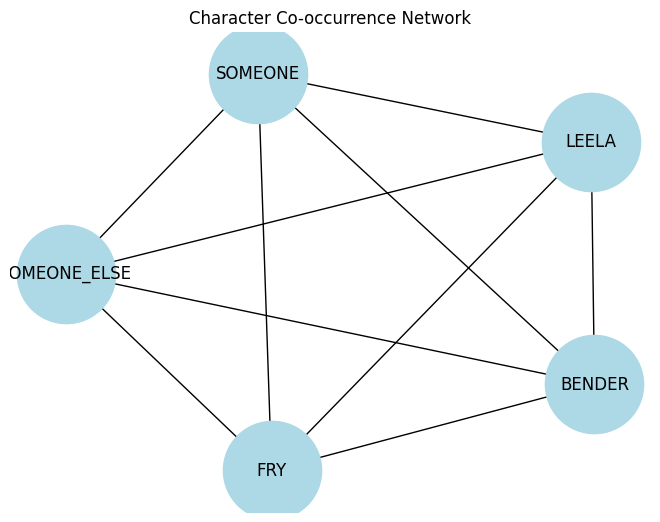

In [1]:
# !pip install pandas
# !pip install networkx
# !pip install pyvis
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Sample XML data
xml_data = """
<dialogue>
    <speak who="LEELA">Space pirates!</speak>
    <speak who="FRY">Space pirates?</speak>
    <speak who="LEELA">You know, pirates - but in space.</speak>
    <speak who="PIRATE">Avast mateys!</speak>
    <speak who="PIRATE">Electronically transfer your space doubloons afore I send thee to Davey Jarg's locker!</speak>
    <speak who="BENDER">Hey! Keep it down you kids! I'm trying to take a nap!</speak>
    <speak who="FRY">Come on, come on.</speak>
    <speak who="LEELA">Fry to battlestations. Fire torpedo number three.</speak>
    <speak who="FRY">Firing torpedo number three!</speak>
    <speak who="BENDER">Huh? What?</speak>
    <info>STUFF</info>
    <speak who="SOMEONE">Electronically transfer your space doubloons afore I send thee to Davey Jarg's locker!</speak>
    <speak who="SOMEONE_ELSE">Hey! Keep it down you kids! I'm trying to take a nap!</speak>
    <speak who="FRY">Come on, come on.</speak>
    <speak who="LEELA">Fry to battlestations. Fire torpedo number three.</speak>
    <speak who="FRY">Firing torpedo number three!</speak>
    <speak who="BENDER">Huh? What?</speak>
</dialogue>
"""

# Parse XML
root = ET.fromstring(xml_data)

# Extract characters in each scene
scenes = []
current_scene = set()
for elem in root:
    if elem.tag == 'speak':
        speaker = elem.attrib['who']
        current_scene.add(speaker)
    elif elem.tag == 'info':
        current_scene = set()
        scenes.append(current_scene)
    print(f"current scene: {current_scene}")
    print(f"scenes at this point? {scenes}")

# Create a mapping between characters and indices
characters = sorted(set().union(*scenes))
character_indices = {character: i for i, character in enumerate(characters)}
print(characters)

# Initialize co-occurrence matrix
num_characters = len(characters)
co_occurrence_matrix = np.zeros((num_characters, num_characters), dtype=int)

# Update co-occurrence matrix
for scene in scenes:
    for character1 in scene:
        for character2 in scene:
            i = character_indices[character1]
            j = character_indices[character2]
            co_occurrence_matrix[i, j] += 1

# Print co-occurrence matrix
print(co_occurrence_matrix)

# Create a graph from the co-occurrence matrix
G = nx.Graph()
for i, character1 in enumerate(characters):
    for j, character2 in enumerate(characters):
        if i != j and co_occurrence_matrix[i, j] > 0:
            G.add_edge(character1, character2, weight=co_occurrence_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G, seed=578)  # Positions for all nodes
nx.draw(G, pos, node_size=5000, node_color='lightblue', font_size=10)

# Replace character indices with names
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the plot
plt.title("Character Co-occurrence Network")
plt.axis("off")
plt.show()

In [2]:
# Let's look at a larger sample of XML for one whole epsiode.
import xml.etree.ElementTree as ET
import numpy as np

# Sample XML data
xml_data = """
<dialogue>
<speak who="LEELA">
That's not torpedo three. That's not 
torpedo three at all.</speak>

<info>Cut to: Outside Ship. Bender screams.</info>

<speak who="BENDER">
Damn you Fry and Lee......la!</speak>

<info>The pirate ship starts to spin widly out of control. The pirate 
looks through the window sadly.</info>

<speak who="PIRATE"><info>FROM SHIP</info>
Too late do I realise that my children 
are my only real treasures.</speak>

<info>The ship explodes. Bender carries on flying.</info>

<speak who="BENDER">
<info>(shouting)</info> Help! Mechanical man overboard!</speak>

<info>Cut to: Ship's Cockpit.</info>

<speak who="FRY">
Go after him Leela!</speak>

<info>Leela pushes the throttle forward. The ship's engines struggle 
but they go no faster.</info>

<speak who="LEELA">
It's no use. We were going full speed 
when we fired him so he's going even 
faster than that.</speak>

<speak who="FRY">
You mean we can never catch up to him? 
Not even if we rub the engine with cheetah 
blood?</speak>

<speak who="LEELA">
I don't know how to say this Fry. But 
Bender is doomed to drift through space...forever.</speak>

<info>Fry looks ahead through the windscreen.</info>

<speak who="FRY">
<info>(solemn)</info> He always wanted to drift forever. 
But through the American Southwest.</speak>

<info>Bender continues flying through space still holding the bag 
of swag.</info>

<speak who="BENDER">
I'm going too fast. I've gotta lose 
momentum.  Ohh. I'm gonna spend eternity 
alone with barely any swag.  Ooo! Hey 
universe! Check out the dude with the 
rolex!  Wow! Ostentatious!  Except what 
good is a candelabra without - wait 
I know!  Ah the pity. Fated to drift 
forever through the void as gravity's 
plaything. Oh cruel fate, to be thusly 
boned. Ask not for whom the bone bones. 
It bones for thee. The only thing that 
keeps me sane is the thought that I 
have all eternity in which to perfect 
my art.  Ohh!  Damn you!</speak>

<info>He picks up the candelabra and uses it to smash up the piano.</info>

<info>Time Lapse. Bender scratches something onto his door. It is 
something similar to the sketch on the Pioneer space probe. But 
the man and woman have a huge Bender standing above them growling.</info>

<speak who="BENDER">
There. Now when I'm found in a million 
years people will know what the score 
was.  Hey what's bombarding me?  Oh 
no! An asteroid field. If even a pea 
sized asteroid were to whiz through 
my skull it could -  Ow! Hurt slightly! 
Well that was fun. Now for eons of 
loneliness.</speak>

<info>Time Lapse. Muffled voices come from Bender's door.</info>

<speak who="BENDER">
Huh?</speak>

<info>Several tiny things come from the asteroid on Bender's door. 
He zooms in. They are little people.</info>

<speak who="SHRIMPKIN PRIEST">
Fellow Shrimpkins, behold he who hath 
taken us unto his breast.</speak>

<info>The Shrimpkims chatter.</info>

<speak who="BENDER">
Holy frijoles!</speak>

<speak who="SHRIMPKIN PRIEST">
All bow before the great Metal Lord!</speak>

<info>The Shrimpkins bow.</info>

<speak who="BENDER">
Worshippers? This ought to liven up 
my endless tragic voyage.</speak>

<info>He laughs insanely.</info>

<info>Time Lapse.</info>

<speak who="SHRIMPKIN PRIEST">
All hail the Metal Lord!</speak>

<speak who="SHRIMPKINS">
<info>(chanting)</info> So hailed!</speak>

<speak who="BENDER">
Hmm, those peewees think I'm God huh? 
Hard to blame 'em!  I am the Metal Lord. 
Who are you?</speak>

<speak who="MALACHI">
I am called Malachi, Lord. It means, 
um, "He who really loves the Metal Lord."</speak>

<speak who="BENDER">
Listen here Malachi. Time for a religious 
donation. Hand over your wallet.</speak>

<speak who="MALACHI">
But Lord. We are a poor and simple folk.</speak>

<speak who="BENDER">
Poor? Oh crap.</speak>

<info>He takes Malachi off his eyes and zooms into the Shrimpkin village 
on the asteroid. On the porch of Malachi's home his wife cross-stiches 
something and his children play.</info>

<speak who="MALACHI">'S WIFE
What art thou doing Malachi Jr?</speak>

<info>Malachi Jr hugs a big pot.</info>

<speak who="MALACHI JR">
I'm practising to hug daddy when he 
gets back from God.  Mmm! Mmm!</speak>

<info>Bender retracts his eyes.</info>

<speak who="BENDER">
Eck! Gag unto me with a spoon! Malachi, 
it's high time I laid down a few commandments. 
You got a chisel? Take this down.  Number 
one -</speak>

<info>Time Lapse. Malachi stands on a rock before the other Shrimpkins 
holding a stone tablet.</info>

<speak who="MALACHI">
Behold: The One Commandment.</speak>

<info>He holds up the tablet. Written on it is "God Needs Booze."</info>

<speak who="BENDER">
<info>(shouting)</info> Make it a double!</speak>

<info>Planet Express: Attic. Farnsworth sniffs around on the smelloscope.</info>

<speak who="FRY">
Can you find him Professor?</speak>

<speak who="FARNSWORTH">
No. I'm afraid the smelloscope isn't 
powerful enough. Bender's odour is so 
mild it's being overpowered by local 
sources.</speak>

<info>He, Fry and Leela glare at Zoidberg. He jumps up and claps with 
delight.</info>

<speak who="ZOIDBERG">
Hooray, people are paying attention 
to me!</speak>

<info>Fry walks towards the window and puts his hand on the glass. 
Enter Amy, Hermes and a robot.</info>

<speak who="AMY">
Fry, we brought someone to cheer you 
up.</speak>

<speak who="HERMES">
His name is Helper and he's eager to 
be your new best friend.</speak>

<info>Helper looks a little bit like Bender but is more blocky looking.</info>

<speak who="HELPER">
Hello there chum. I understand you miss 
your buddy! Have a pudding pop!</speak>

<speak who="FRY">
No that's I don't -</speak>

<speak who="HELPER">
Who wants to go to an amusement park?</speak>

<speak who="FRY">
Well, I guess that sounds OK.</speak>

<speak who="HELPER">
Have a good time. Hey, I hear your friend 
Bender is back.</speak>

<speak who="FRY">
What? Really?</speak>

<speak who="HELPER">
No. I just thought you would enjoy that 
for a moment.</speak>

<info>Bender drifts through space to Also Sprach Zarathustra. On his 
body a huge beer tower has been built and the Shrimpkin village 
has grown to include several fields.</info>

<info>Time Lapse. Bender tastes the Lordweiser beer from the tower.</info>

<speak who="BENDER">
Ooo! Microbrewed! My guys did alright! 
I think I'll make my countenance to 
shine down upon them!  Malachi, good 
work. There's no slowing down with the 
Metal Lord tonight.</speak>

<speak who="MALACHI">
Yes, tonight is kind of special.</speak>

<speak who="BENDER">
Wait a second. Did you rip off your 
own arm as a joke?</speak>

<speak who="MALACHI">
Nay. Like most of your followers I was 
maimed while building the great brewery. 
Others died from the pestelent fumes 
it spewed forth.  And of course, the 
liquor industry attracted organised 
crime.</speak>

<info>Mobsters drive past Malachi's home shooting at each other. Malachi's 
wife gasps, picks up a gun and shoots at the cars. Bender watches.</info>

<speak who="BENDER">
Aw, it's all my fault. Malachi, tell 
thy people that the Lord is moved by 
their plight.</speak>

<info>A tear drops from his eye. In the Shrimpkin village the tear 
looks huge. It rushes towards the Shrimpkins and they scream 
and run out of its way. The tidal wave washes through the village 
and sweeps away Malachi Jr. He grabs hold of a branch. The villagers 
gasp.</info>

<speak who="MALACHI">'S WIFE
Malachi Jr, no!</speak>

<speak who="MALACHI JR">
Daddy, I can't hold much longer. My 
arms are tired from hugging.</speak>

<info>Malachi, back with his wife, falls to his knees.</info>

<speak who="MALACHI">
Save him! Save my son oh Metal Lord!</speak>

<info>Bender rolls up his sleeves.</info>

<speak who="BENDER">
This looks like a job for God!  What 
the? Malachi, what manner of deal is 
this with the chanting?</speak>

<speak who="MALACHI">
They saw you save my son. Now everyone 
is praying for their own miracles.</speak>

<info>Bender sighs.</info>

<speak who="BENDER">
Very well. What do they want?</speak>

<speak who="MALACHI">
The people of that village pray for 
wealth.</speak>

<info>Bender pulls out a Coolio coin and tosses it to the Shrimpkins. 
It flattens several houses. Bender screams and picks the coin 
up again. He looks under the ruined houses.</info>

<speak who="BENDER">
Um, that was a practice miracle. Who's 
next?</speak>

<speak who="MALACHI">
The farmers pray for sunlight so that 
their barley might make a more refreshing 
beer for today's God on the go.</speak>

<speak who="BENDER">
Very well. Let there be light.</speak>

<info>He closes his eye visor and reflects a star's rays onto the 
farmers' fields.</info>

<speak who="FARMER #1">
Yippee!</speak>

<speak who="FARMER #2">
Hooray!</speak>

<info>The fields burst into flames and so do the farmers.</info>

<speak who="BENDER">
I got it I got it!  Um, when you're 
writing the Bible, you might want to 
omit that last miracle.</speak>

<info>Fry and Bender's Lounge. Fry picks up a photo of Bender holding 
him over the side of the Statue Of Liberty's torch. He sighs.</info>

<speak who="FRY">
He decided not to let go.  I can't believe 
you're gone. I won't! If I can't reach 
you physically, I'll just have to try 
something desperately crazy!</speak>

<info>First Amalgamated Church. Fry sits in the priest's office.</info>

<speak who="FRY">
So that's my story Father Changstein 
el Gamahl. Is there anything religion 
can do to help me find my friend?</speak>

<speak who="PRIEST">
Well, we could join together in prayer.</speak>

<speak who="FRY">
Uh-huh but is there anything useful 
we can do?</speak>

<speak who="PRIEST">
No.</speak>

<info>Gypsy's Caravan. Fry revisits the fairground Gypsy that helped 
Bender find out more about the Werecar virus.</info>

<speak who="GYPSY">
Sure I hold s�ance, channel your friend 
no problem. Insert coin.  I am your 
friend...Bonder.</speak>

<speak who="FRY">
Bonder? Is it really you?</speak>

<speak who="GYPSY">
Yes. I am fine. Give the gypsy $10.</speak>

<speak who="FRY">
Wait a minute. Bender's name isn't Bonder, 
it's Bender. You're a fraud!</speak>

<speak who="GYPSY">
Look, you want false hope or not?</speak>

<speak who="FRY">
Only if you don't have any real hope.</speak>

<speak who="GYPSY">
Well, there is perhaps one way. Have 
you heard of the Monks Of The Shubah?</speak>

<speak who="FRY">
I've not heard of them.</speak>

<speak who="GYPSY">
They are an ancient order who believe 
God exists in the depths of space. They 
have built the universe's most powerful 
radio telescope, high in the Himalayas, 
to search for him.</speak>

<speak who="FRY">
You think they'd let me use it to look 
for Bender?</speak>

<speak who="GYPSY">
What am I psychic? I mean yes! Yes, 
I'm sure they will. Yes.</speak>

<info>Bender swims through space to The Blue Danube.</info>

<speak who="MALACHI">
Oh Metal Lord, hear my prayer.</speak>

<info>Bender sighs.</info>

<speak who="BENDER">
<info>(irrate)</info> Yes Malachi what is it this 
time?</speak>

<speak who="MALACHI">
My Lord, the infidels on your back no 
longer believe in you. They say their 
prayers go unheeded.</speak>

<speak who="BENDER">
Of course they're unheeded how am I 
supposed to hear prayers coming out 
of my ass?</speak>

<speak who="MALACHI">
They talk of war against the faithful. 
I beseech thee. Rise up against them, 
smite someone who deserves it for once.</speak>

<info>Bender sighs.</info>

<speak who="BENDER">
Malachi, every time I interfere I only 
make things worse. You're best off solving 
your own problems.</speak>

<speak who="MALACHI">
But, but Metal Lord.</speak>

<speak who="BENDER">
What part of "nay" doesn't thou understand?</speak>

<info>Ed's Hiking Supplies &amp; Spelunketeria. Fry talks to a salesman 
behind a counter.</info>

<speak who="FRY">
Sir, I'm outfitting an expedition to 
a monestary high in the Himalayas. I'll 
need a long sleeved coat.</speak>

<info>The salesman hands him a coat.</info>

<speak who="LEELA">
Look, I miss Bender almost half as much 
as you do but you can't bring him back 
this way. It's hopeless.</speak>

<speak who="FRY">
You can't give up hope just because 
it's hopeless. You gotta hope even more 
and cover your ears and go "blah blah 
blah blah blah blah blah!"  <info>(shouting)</info> 
I'd also like a pack mule.</speak>

<speak who="SALESMAN">
<info>(shouting)</info> At once sir!</speak>

<info>He pulls down a fully equipt mule from a high shelf.</info>

<speak who="LEELA">
Well, you obviously won't listen to 
reason, so I guess I'll listen to idioticness 
and come with you. But we'll need a 
Sherpa to guide us.</speak>

<info>The salesman reaches up to the high shelf with the hook and 
jabs the Sherpa. He screams.</info>

<info>On the porch of his home Malachi sits with his children and 
wife and they read The Bible. By Bender With Malachi. On the 
first page is a picture of Bender boxing a lion.</info>

<speak who="BENDER">
Now that's one Bible that doesn't disappoint 
on every page! Looks like my society's 
running pretty well without my meddling 
- huh?  Atomic bombs? Oh no! Those unbelievers 
from my backside must have found my 
nuclear pile!</speak>

<speak who="MALACHI">
Fear not my Lord, we shall be with you 
soon.</speak>

<speak who="BENDER">
You're with me now. This is the maximum 
level of being with me!</speak>

<speak who="MALACHI">
We will solve our own problems as you 
commanded. The time has come to convert 
the unbelievers.</speak>

<speak who="BENDER">
Convert them?</speak>

<speak who="MALACHI">
To radioactive vapour!</speak>

<info>Missile launchers rise up from the ground, fire and destroy 
the village on Bender's ass.</info>

<speak who="MALACHI JR">
Look Daddy! I'm hugging God! Mmm! Mmm! 
Maybe if I hug him real hard he'll save 
us from -</speak>

<info>A radioactive shockwave vapourises the family and Bender cries.</info>

<speak who="BENDER">
<info>(crying)</info> No!  <info>(laughing)</info> Ooo it tickles!</speak>

<info>He laughs some more and sighs.</info>

<info>Time Lapse.</info>

<speak who="BENDER">
Hello? Is anyone still alive? How about 
in the porno theatre?  Don't be embarrassed. 
<info>(crying)</info> They're dead. All dead. Who 
would have known playing God could have 
such terrible consequences?</speak>

<info>He cries some more.</info>

<info>Himalayas. The Sherpa, Fry, Leela and the mule walk through 
the blizzard. The wind howls and the mule groans.</info>

<speak who="LEELA">
<info>(shouting)</info> Fry, if I drop dead from 
exhaustion make sure my body freezes 
in a dignified position. None of that 
huddled over for warmth crap.</speak>

<info>Time Lapse. They reach the summit. Fry gasps. In front of them 
is a huge radio telescope and in he middle is the monastery.</info>

<speak who="SHERPA">
Behold. The Monastery Of The Shubah. 
I must leave you now for I am not holy 
enough to enter.</speak>

<speak who="FRY">
OK.</speak>

<info>He bleches and spits. He and Leela walk towards an old wood 
and rope bridge.</info>

<speak who="LEELA">
Looks rickety. We'd better test it.</speak>

<info>She pats the mule and it steps onto the bridge. The bridge moves 
forward like a moving walkway.</info>

<speak who="FEMALE VOICE">
Welcome to our monastery. Please stand 
to one side to let faster pilgrims by.</speak>

<info>Behind the mule Fry and Leela tap their feet impatiently.</info>

<info>Bender is still crying. He hears a beeping and looks up.</info>

<speak who="BENDER">
Hey, that galaxy's signalling in binary! 
I gotta signal back! But I only know 
enough binary to as where the bathroom 
is. <info>(shouting)</info> You speak English?</speak>

<speak who="GALAXY">
I do now.</speak>

<info>It pulls Bender towards it.</info>

<speak who="BENDER">
What are you some kind of galactic computer?</speak>

<speak who="GALAXY">
Possible. I am user friendly. My good 
chum.</speak>

<speak who="BENDER">
Who built you?</speak>

<speak who="GALAXY">
I have always been.</speak>

<speak who="BENDER">
Oh my God. Are you God?</speak>

<speak who="GOD">
Possible. I do feel compasson for all 
living things. My good chum.</speak>

<speak who="BENDER">
But why would God think in binary? Unless...you're 
not God, but the remains of a computerised 
space probe that collided with God.</speak>

<speak who="GOD">
That seems probable.</speak>

<info>Monastery Of The Shubah. The radio dish tilts as the monks search 
the sky.</info>

<speak who="MONK #1">
A member of our brotherhood sits at 
these controls every hour of every day, 
scanning the heavens for God.</speak>

<info>Monk #2, bored out of his skull, controls the dish. Suddenly 
he sees something.</info>

<speak who="MONK #2">
There he is! No. No, wait, no.</speak>

<speak who="LEELA">
How long have you been at it?</speak>

<speak who="MONK #1">
700 years. We've not yet examined one 
ten-millionth of the sky. But we will 
go on until we find the Almighty, even 
if it takes until the end of time.</speak>

<speak who="FRY">
And then what?</speak>

<speak who="MONK #1">
Then we utter unto him a short prayer. 
You see, the telescope is also an amplifying 
transmitter.</speak>

<speak who="LEELA">
Sort of like a giant kareoke machine?</speak>

<speak who="MONK #1">
Not really. Would you like to see our 
giant kareoke machine?</speak>

<speak who="LEELA">
Not really.</speak>

<speak who="FRY">
Hmm, finding God, that - that's important, 
yeah. But you know what might be a treat 
for everyone? If you let me use the 
telescope to find my lost friend Bender.</speak>

<speak who="MONK #1">
I don't know what to say, other than 
absolutely not. Your loss is a tragedy 
but our work -</speak>

<speak who="FRY">
Aw c'mon, you guys have forever to look 
for God. All I'm asking is one measley 
lifetime to find my friend.</speak>

<speak who="MONK #2">
He speaks out of love for his friend. 
Perhaps that love in his heart is God!</speak>

<speak who="MONK #1">
Oh how convenient. A theory about God 
that doesn't require looking through 
a telescope. Get back to work!</speak>

<speak who="FRY">
That telescope is as much mine as it 
is anybody's. I'm using it whether you 
give me permission or not.</speak>

<info>The four monks take up kung fu positions. Leela jumps forward.</info>

<speak who="LEELA">
Heyya! You're order may be famous for 
it's martial arts. But I've never met 
a holy man I couldn't clobber.</speak>

<speak who="MONK #1">
Actually we only practice martial arts 
as a form of meditation. We are a strictly 
non-violent sect.</speak>

<speak who="LEELA">
Oh. Then get in the laundry room or 
I'll kick your butts!</speak>

<info>They file into the laundry room.</info>

<speak who="MONK #3">
This is the worst crazy sect I've ever 
been in.</speak>

<info>Fry slams the door behind them.</info>

<info>Bender talks to God.</info>

<speak who="BENDER">
So, do you know what I'm gonna do before 
I do it?</speak>

<speak who="GOD">
Yes.</speak>

<speak who="BENDER">
What if I do something different?</speak>

<speak who="GOD">
Then I don't know that.</speak>

<speak who="BENDER">
Cool cool! I bet a lot of people pray 
to you huh?</speak>

<speak who="GOD">
Yes, but there are so many asking so 
much. After a while you just sorta tune 
it out.</speak>

<speak who="BENDER">
Y'know, I was God once.</speak>

<speak who="GOD">
Yes I saw. You were doing well until 
everyone died.</speak>

<speak who="BENDER">
It was awful. I tried helping them. 
I tried not helping them but in the 
end I couldn't do them any good. Do 
you think what I did was wrong?</speak>

<speak who="GOD">
Right and wrong are just words. What 
matters is what you do.</speak>

<speak who="BENDER">
Yeah I know, that's why I asked if what 
I did - forget it.</speak>

<speak who="GOD">
Bender, being God isn't easy, if you 
do too much, people get dependent. And 
if you do nothing, they lose hope. You 
have to use a light touch, like a safecracker 
or a pickpocket.</speak>

<speak who="BENDER">
Or a guy who burns down the bar for 
the insurance money.</speak>

<speak who="GOD">
Yes, if you make it look like an electrical 
thing. When you do things right, people 
won't be sure you've done anything at 
all.</speak>

<speak who="BENDER">
Does that mean you wouldn't send me 
back to Earth even if I prayed to you?</speak>

<speak who="GOD">
Earth? Which way is that?</speak>

<info>Bender looks around.</info>

<speak who="BENDER">
<info>(sadly)</info> I don't know.</speak>

<info>Monastery Of The Shubah. Fry frantically turns the radio dish 
around and shouts into the microphone.</info>

<speak who="FRY">
Bender? Bender?</speak>

<info>The monks knock on the door.</info>

<info>Fry yells into the microphone.</info>

<speak who="FRY">
Hello? Has anyone out there seen Bender?</speak>

<speak who="LRRR"><info>ON SPEAKER</info>
No, quit asking.</speak>

<speak who="LEELA">
Fry, it's been three days. And even 
if you stay here the rest of your life, 
there is virtually no chance of finding 
him. It's time to give up.</speak>

<speak who="FRY">
<info>(sadly)</info> You're right. I'm never gonna 
see him again. I know he was evil and 
on more than one occasion he, he actually 
stole my blood.  But still, I wish I 
had Bender back.</speak>

<info>Pullback: The radio telescope echos his words into the depths 
of space and in a pullback lifted from Contact the signal reaches 
God. Bender is asleep.</info>

<speak who="GOD">
Huh?</speak>

<info>Bender wakes up.</info>

<speak who="BENDER">
Huh? Wha? You say something?</speak>

<speak who="GOD">
No, no. Well so long. Remember what 
we talked about.</speak>

<info>He straps a parachute to Bender and throws him towards Earth. 
Bender screams.</info>

<info>Cut to: Himalayas. Fry and Leela make their way down the mountain. 
Bender screams and falls through the atmosphere. Fry gasps.</info>

<speak who="BENDER">
Hot hot hot hot!</speak>

<info>He screams and the parachute opens and he lands on the mountain 
next to Fry and Leela. He is glowing red hot.</info>

<speak who="FRY">
Bender! It's a miracle!  Ow!</speak>

<speak who="LEELA">
This is by a wide margin the least likely 
thing that has ever happened.</speak>

<speak who="BENDER">
Guys, you'll never believe what happened. 
First I was God then I met God!</speak>

<speak who="FRY">
We climbed a mountain and locked up 
some monks.</speak>

<speak who="LEELA">
Oh no the monks. We forgot to let them 
out of the laundry room.</speak>

<speak who="FRY">
Do we have to? I mean they're monks. 
I'm sure their God will let them out 
or at least give them more shoes to 
eat.</speak>

<speak who="BENDER">
Fat chance. You can't count on God for 
jack. He pretty much told me so himself. 
Now come on. If we don't save those 
monks no one will!</speak>

<info>He takes off his parachute and starts back up the mountain.</info>

<info>Pullback: In another pullback, this time lifted from Men In 
Black, God chuckles to Himself.</info>

<speak who="GOD">
When you do things right, people won't 
be sure you've done anything at all.</speak>

<info>THE END</info>
</dialogue>
"""

# Parse XML
root = ET.fromstring(xml_data)

# Extract characters in each scene
scenes = []
current_scene = set()
# ebb: set() remoes duplicates. 
for elem in root:
    if elem.tag == 'speak':
        speaker = elem.attrib['who']
        current_scene.add(speaker)
    elif elem.tag == 'info':
        if current_scene:
            scenes.append(current_scene)
            current_scene = set()

# Create a mapping between characters and indices
characters = sorted(set().union(*scenes))
character_indices = {character: i for i, character in enumerate(characters)}
print(characters)
print(character_indices)

# Initialize co-occurrence matrix
num_characters = len(characters)
co_occurrence_matrix = np.zeros((num_characters, num_characters), dtype=int)
# LOOK UP HOW TO REALLY DO THIS IN PANDAS co-occurrence_pd_matrix =  pd.DataFrame((num_characters, num_characters), dtype=int)


# Update co-occurrence matrix
for scene in scenes:
    for character1 in scene:
        for character2 in scene:
            i = character_indices[character1]
            j = character_indices[character2]
            co_occurrence_matrix[i, j] += 1

# Print co-occurrence matrix
print(co_occurrence_matrix)

['AMY', 'BENDER', 'FARMER #1', 'FARMER #2', 'FARNSWORTH', 'FEMALE VOICE', 'FRY', 'GALAXY', 'GOD', 'GYPSY', 'HELPER', 'HERMES', 'LEELA', 'LRRR', 'MALACHI', 'MALACHI JR', 'MONK #1', 'MONK #2', 'MONK #3', 'PIRATE', 'PRIEST', 'SALESMAN', 'SHERPA', 'SHRIMPKIN PRIEST', 'SHRIMPKINS', 'ZOIDBERG']
{'AMY': 0, 'BENDER': 1, 'FARMER #1': 2, 'FARMER #2': 3, 'FARNSWORTH': 4, 'FEMALE VOICE': 5, 'FRY': 6, 'GALAXY': 7, 'GOD': 8, 'GYPSY': 9, 'HELPER': 10, 'HERMES': 11, 'LEELA': 12, 'LRRR': 13, 'MALACHI': 14, 'MALACHI JR': 15, 'MONK #1': 16, 'MONK #2': 17, 'MONK #3': 18, 'PIRATE': 19, 'PRIEST': 20, 'SALESMAN': 21, 'SHERPA': 22, 'SHRIMPKIN PRIEST': 23, 'SHRIMPKINS': 24, 'ZOIDBERG': 25}
[[ 1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 28  0  0  0  0  1  2  3  0  0  0  1  0  8  0  0  0  0  0  0  0  0  2
   1  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   

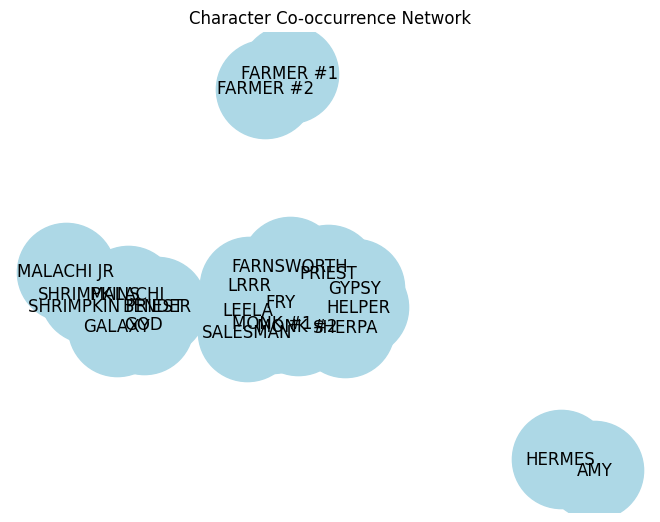

In [3]:
# Now let's visualize it. We'll use networkx for the network data, and pyvis to make it dynamic
#!pip install pyvis

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence matrix
G = nx.Graph()
for i, character1 in enumerate(characters):
    for j, character2 in enumerate(characters):
        if i != j and co_occurrence_matrix[i, j] > 0:
            G.add_edge(character1, character2, weight=co_occurrence_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G, seed=578)  # Positions for all nodes
nx.draw(G, pos, node_size=5000, node_color='lightblue', font_size=10)

# Replace character indices with names
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the plot
plt.title("Character Co-occurrence Network")
plt.axis("off")
plt.show()

edge_weights: [0.004329004329004329, 0.26406926406926406, 0.1038961038961039, 0.03463203463203463, 0.08225108225108226, 0.0, 0.030303030303030304, 0.21212121212121213, 0.0735930735930736, 0.0735930735930736, 0.0735930735930736, 0.0, 0.05627705627705628, 0.06493506493506493, 0.05194805194805195, 0.0735930735930736, 0.05627705627705628, 0.0735930735930736, 0.03896103896103896, 0.030303030303030304, 0.0021645021645021645, 0.032467532467532464, 0.030303030303030304, 0.0735930735930736, 0.008658008658008658, 0.12987012987012986, 0.03463203463203463, 0.004329004329004329, 0.006493506493506494]


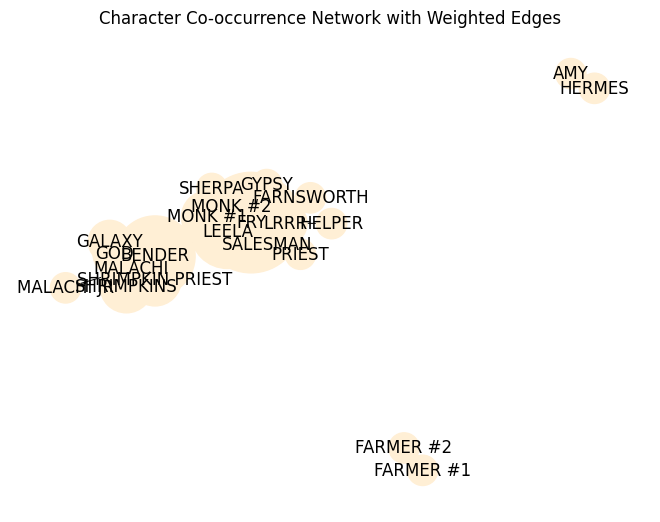

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence matrix
G = nx.Graph()
for i, character1 in enumerate(characters):
    for j, character2 in enumerate(characters):
        if i != j and co_occurrence_matrix[i, j] > 0:
            G.add_edge(character1, character2, weight=co_occurrence_matrix[i, j])

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate edge betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G, weight='weight')

# Set edge widths based on betweenness centrality
edge_weights = [edge_betweenness_centrality[edge] for edge in G.edges()]
# Multiply edge weights by 100 for thicker lines
edge_widths = [weight * 10 for weight in edge_weights]


# Set node sizes based on degree centrality
node_sizes = [10000 * degree_centrality[character] for character in G.nodes()]

# Set edge weights based on betweenness centrality
edge_weights = [edge_betweenness_centrality[edge] for edge in G.edges()]
print(f"edge_weights: {edge_weights}")
# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
nx.draw(G, pos, node_size=node_sizes, node_color='papayawhip', font_size=10, width=edge_widths)

# Replace character indices with names
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Show the plot
plt.title("Character Co-occurrence Network with Weighted Edges")
plt.axis("off")
plt.show()

In [5]:
# Let's try this co-occurrence network with pyvis! 
from pyvis.network import Network

# Create a Pyvis Network instance with increased height and width
net = Network(height="800px", width="100%", notebook=True, cdn_resources="in_line")

# Create a dictionary to map node IDs to character names
node_labels = {node_id: character_name for node_id, character_name in enumerate(characters)}

# Add nodes with character labels
for node, centrality in degree_centrality.items():
    size = centrality * 100  # Scale the size based on degree centrality
    character_name = node_labels.get(node, str(node))  # Get the character name using the node ID or use node ID if not found
    net.add_node(node, size=size, label=character_name)  # Use character name as label

# Add edges with style based on edge-betweenness centrality
for edge, centrality in edge_betweenness_centrality.items():
    width = centrality * 10  # Scale the width based on edge-betweenness centrality
    net.add_edge(edge[0], edge[1], width=width)

# Enable physics simulation
net.force_atlas_2based()

# Show the network
net.show("network.html")

network.html


## ADJACENCY MATRIX NETWORK
This one is based on proximity of characters to each other.

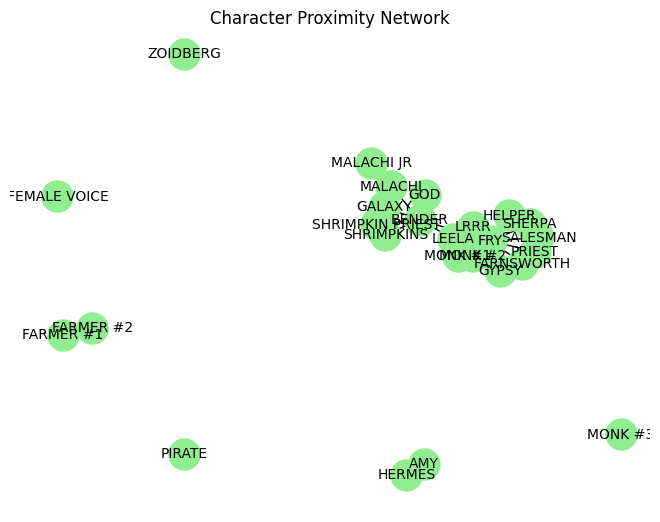

In [6]:

# Parse XML data and extract speaking sequences of characters
# You may need to adjust this based on your XML structure
scenes = []
current_scene = []
# NOTICE: this isn't a set anymore, so no duplicates are removed. This is important for an adjacency network.
for elem in root:
    if elem.tag == 'speak':
        current_scene.append(elem.attrib['who'])
    elif elem.tag == 'info':
        if current_scene:
            scenes.append(current_scene)
            current_scene = []

# Determine proximity of characters based on speaking sequence
adjacency_matrix = np.zeros((len(characters), len(characters)), dtype=int)
for scene in scenes:
    for i in range(len(scene) - 1):
        character1 = scene[i]
        character2 = scene[i + 1]
        i = character_indices[character1]
        j = character_indices[character2]
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1

# Create a graph from the adjacency matrix
G = nx.Graph(adjacency_matrix)

# Replace character indices with names
node_labels = {i: character for i, character in enumerate(characters)}

# Visualize the network
pos = nx.spring_layout(G, seed=476)
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='lightgreen', font_size=10)
plt.title("Character Proximity Network")
plt.show()

In [9]:
from pyvis.network import Network

# Create a Pyvis Network instance with increased height and width
net = Network(height="800px", width="100%", notebook=True, cdn_resources="in_line", select_menu=True)

# Create a dictionary to map node IDs to character names
node_labels = {node_id: character_name for node_id, character_name in enumerate(characters)}

print(f"degree_centrality {degree_centrality}")

print(f"eigenvector_centrality {nx.eigenvector_centrality(G)}")
# Add nodes with character labels
for node, centrality in degree_centrality.items():
    size = centrality * 100  # Scale the size based on degree centrality
    character_name = node_labels.get(node, str(node))  # Get the character name using the node ID or use node ID if not found
    net.add_node(node, size=size, label=character_name)  # Use character name as label

# Add edges with style based on edge-betweenness centrality
for edge, centrality in edge_betweenness_centrality.items():
    width = centrality * 10  # Scale the width based on edge-betweenness centrality
    net.add_edge(edge[0], edge[1], width=width, smooth=True)

# Enable physics simulation
net.force_atlas_2based()

# Show the network
net.show("network.html")



degree_centrality {'AMY': 0.047619047619047616, 'HERMES': 0.047619047619047616, 'BENDER': 0.3333333333333333, 'FRY': 0.5238095238095237, 'GALAXY': 0.09523809523809523, 'GOD': 0.09523809523809523, 'LEELA': 0.2857142857142857, 'MALACHI': 0.19047619047619047, 'SHRIMPKIN PRIEST': 0.14285714285714285, 'SHRIMPKINS': 0.14285714285714285, 'FARMER #1': 0.047619047619047616, 'FARMER #2': 0.047619047619047616, 'FARNSWORTH': 0.047619047619047616, 'GYPSY': 0.047619047619047616, 'HELPER': 0.047619047619047616, 'LRRR': 0.09523809523809523, 'MONK #1': 0.14285714285714285, 'MONK #2': 0.14285714285714285, 'PRIEST': 0.047619047619047616, 'SALESMAN': 0.09523809523809523, 'SHERPA': 0.047619047619047616, 'MALACHI JR': 0.047619047619047616}
eigenvector_centrality {0: 7.345206338315665e-11, 1: 0.34044712416235096, 2: 7.345206338315665e-11, 3: 7.345206338315665e-11, 4: 0.13436541859535675, 5: 8.756168291945058e-18, 6: 0.5679985760041879, 7: 0.08053746397897246, 8: 0.08053746397897246, 9: 0.13436541859535675, 1

In [19]:
from pyvis.network import Network

# Create a Pyvis Network instance with increased height and width
net = Network(height="800px", width="100%", notebook=True, cdn_resources="in_line")

# Create a dictionary to map node IDs to character names
node_labels = {node_id: character_name for node_id, character_name in enumerate(characters)}

# Add nodes with character labels
for node, centrality in degree_centrality.items():
    size = centrality * 100  # Scale the size based on degree centrality
    character_name = node_labels.get(node, str(node))  # Get the character name using the node ID or use node ID if not found
    net.add_node(node, size=size, label=character_name)  # Use character name as label

# Add edges with style based on edge-betweenness centrality
for edge, centrality in edge_betweenness_centrality.items():
    width = centrality * 10  # Scale the width based on edge-betweenness centrality
    net.add_edge(edge[0], edge[1], width=width, smooth=True)

# Enable physics simulation
net.force_atlas_2based()

# Show the network
net.show("network.html")



network.html


In [10]:
# THESE NEXT CELLS DON'T WORK YET! 
# Create a dictionary to map node IDs to character names
node_labels = {node_id: character_name for node_id, character_name in enumerate(characters)}

# Define colors for the spectrum from red to blue
color_range = ['#ff0000', '#0000ff']  # Red to Blue

# Add nodes with size based on degree centrality and color based on eigenvector centrality
for node, degree_cent, eigenvector_cent in zip(node_labels, degree_centrality, ecentrality):
    size = degree_cent * 100  # Scale the size based on degree centrality
    # color_index = int((eigenvector_cent- min_ecentrality) / (max_ecentrality - min_ecentrality) * (len(color_range) - 1))
    color = get_color(ecentrality)
    character_name = node_labels.get(node, str(node))  # Get the character name using the node ID or use node ID if not found
    net.add_node(node, color=color, size=size, label=character_name)  # Use character name as label


# Add edges with style based on edge-betweenness centrality
# Add edges with style based on edge-betweenness centrality
for (node1, node2), (betweenness_cent, closeness_cent) in zip(G.edges(), zip(edge_betweenness_centrality.values(), closeness_centrality.values())):
    print(node1, node2)

print(G.nodes())

print(edge_betweenness_centrality)
print(closeness_centrality)

for (node1, node2), (betweenness_cent, closeness_cent) in zip(G.edges(), zip(edge_betweenness_centrality.values(), closeness_centrality.values())):
    print(node1, node2)

print(G.nodes())
for (node1, node2), (betweenness_cent, closeness_cent) in zip(G.edges(), zip(edge_betweenness_centrality.values(), closeness_centrality.values())):
    print(node1, node2)




TypeError: unsupported operand type(s) for -: 'int' and 'dict'

In [13]:
# DOESN"T WORK YET

from pyvis.network import Network

# Create a Pyvis Network instance with increased height and width
net = Network(height="800px", width="100%", notebook=True, cdn_resources="in_line")

# Create a dictionary to map node IDs to character names
node_labels = {node_id: character_name for node_id, character_name in enumerate(characters)}

# Define colors for the spectrum from red to blue
color_range = ['#ff0000', '#0000ff']  # Red to Blue

# Add nodes with size based on degree centrality and color based on eigenvector centrality
for node_id, character_name in node_labels.items():
    degree_cent = degree_centrality.get(node_id, 0)
    eigenvector_cent = ecentrality.get(node_id, 0)
    size = degree_cent * 1000  # Scale the size based on degree centrality
    color_index = int((eigenvector_cent - min_ecentrality) / (max_ecentrality - min_ecentrality) * (len(color_range) - 1))
    color = color_range[color_index]
    net.add_node(node_id, color=color, size=size, label=character_name)

# Add edges with style based on edge-betweenness centrality and color based on closeness centrality
for (node1, node2), (betweenness_cent, closeness_cent) in zip(edge_betweenness_centrality.keys(), zip(edge_betweenness_centrality.values(), closeness_centrality.values())):
    if node1 in G.nodes() and node2 in G.nodes():
        if node1 not in net.nodes:
            net.add_node(node1)
        if node2 not in net.nodes:
            net.add_node(node2)
        width = betweenness_cent * 10  # Scale the width based on edge-betweenness centrality
        color_index = int((closeness_cent - min_closeness) / (max_closeness - min_closeness) * (len(color_range) - 1))
        color = color_range[color_index]
        net.add_edge(node1, node2, width=width, color=color)

# Enable physics simulation
net.force_atlas_2based()

# Show the network
net.show("network.html")



NameError: name 'min_ecentrality' is not defined